# A simple example of Gibbs sampling

In [2]:
import ConditionalGMM
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

Consider a mixture of two 2D Gaussian. Join probability is $P(x,y) = \frac{1}{2}\left( N(\mu_1, \text{cov}_1) + N(\mu_2, \text{cov}_2)\right)$. 

If we only know the conditional probabilities $P(x|y)$ and $P(y|x)$, we can use Gibbs sampling to generate samples from $P(x,y)$

Text(0,0.5,'y')

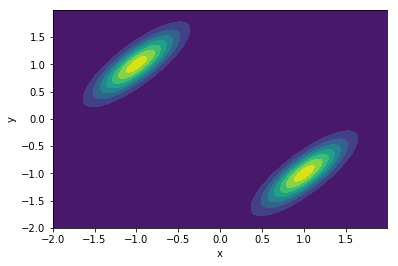

In [3]:
mu1 = [1, -1]
mu2 = [-1, 1]
cov1 = [[.1, 0.1], [0.1, 0.15]]
cov2 = [[.1, 0.1], [0.1, 0.15]]
weights = [0.5, 0.5]
x, y = np.mgrid[-2:2:.01, -2:2:.01]
pos = np.dstack((x, y))
rv1 = scipy.stats.multivariate_normal(mu1, cov1)
rv2 = scipy.stats.multivariate_normal(mu2, cov2)
fig2 = plt.figure()
plt.contourf(x, y, rv1.pdf(pos) + rv2.pdf(pos))
plt.xlabel('x')
plt.ylabel('y')


Define the Gibbs sampling class. Note that only conditional probabilities $P(x|y)$ and $P(y|x)$ are used.

In [4]:
class GibbsSampling:
    def __init__(self, mu1, mu2, cov1, cov2, weights):
        ''' Takes a mixture of two Gaussians with means mu1 and m2, covariance cov1 and cov2, mixing weight weights'''
        self.mu1 = mu1
        self.mu2 = mu2
        self.cov1 = cov1
        self.cov2 = cov2
        self.weights = weights
        means = [mu1, mu2]
        covs = [cov1, cov2]
        self.cGMM_x_given_y = ConditionalGMM.CondGMM(weights, means, covs, [1])
        self.cGMM_y_given_x = ConditionalGMM.CondGMM(weights, means, covs, [0])
        
    def sample(self, point, n=1):
        ''' Given a starting point, generate n samples'''
        x,y = point
        xlist = [x]
        ylist = [y]
        for _ in range(n):
            x = self.cGMM_x_given_y.rvs(y)
            y = self.cGMM_y_given_x.rvs(x)
            xlist.append(float(x))
            ylist.append(float(y))
        return xlist, ylist
    
        
gibbs = GibbsSampling(mu1, mu2, cov1, cov2, weights)

Starting the Gibbs sampling chain at the mean of distribution 1.

For small number of samples, the sampling can be trapped in local maximum

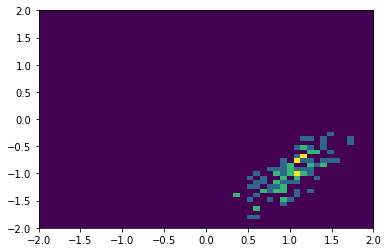

In [8]:
x, y = gibbs.sample(mu1, 100)
plt.hist2d(x,y, bins=50,range= [[-2,2],[-2,2]]);

As long as the distributions are "connected" (irreducible), it can eventually sample all distributions

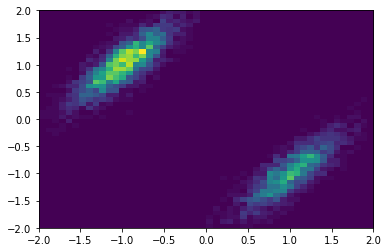

In [9]:
x, y = gibbs.sample(mu1, 5000)
plt.hist2d(x,y, bins=50,range= [[-2,2],[-2,2]]);